In [1]:
import yfinance as yf
import networkx as nx
from networkx.algorithms.approximation import clique
import numpy as np
import itertools 
from itertools import combinations
import time
import pickle
import json
import ast

## Получение данных

In [35]:
stocks = ['AXP', 'AMGN', 'AAPL', 'BA', 'CAT', 'CSCO', 'CVX', 'GS', 'HD', 'HON', 'IBM', 'INTC', 'JNJ', 'KO', 'JPM', 'MCD', 'MMM', 'MRK', 'MFST', 'NKE', 'PG', 'TRV', 'UNH', 'CRM', 'VZ', 'V', 'WBA', 'WMT', 'DIS', 'DOW']
data = yf.download(stocks,'2019-01-01','2020-01-01')

[*********************100%***********************]  30 of 30 completed


In [37]:
list(data.columns)

[('Adj Close', 'AAPL'),
 ('Adj Close', 'AMGN'),
 ('Adj Close', 'AXP'),
 ('Adj Close', 'BA'),
 ('Adj Close', 'CAT'),
 ('Adj Close', 'CRM'),
 ('Adj Close', 'CSCO'),
 ('Adj Close', 'CVX'),
 ('Adj Close', 'DIS'),
 ('Adj Close', 'DOW'),
 ('Adj Close', 'GS'),
 ('Adj Close', 'HD'),
 ('Adj Close', 'HON'),
 ('Adj Close', 'IBM'),
 ('Adj Close', 'INTC'),
 ('Adj Close', 'JNJ'),
 ('Adj Close', 'JPM'),
 ('Adj Close', 'KO'),
 ('Adj Close', 'MCD'),
 ('Adj Close', 'MFST'),
 ('Adj Close', 'MMM'),
 ('Adj Close', 'MRK'),
 ('Adj Close', 'NKE'),
 ('Adj Close', 'PG'),
 ('Adj Close', 'TRV'),
 ('Adj Close', 'UNH'),
 ('Adj Close', 'V'),
 ('Adj Close', 'VZ'),
 ('Adj Close', 'WBA'),
 ('Adj Close', 'WMT'),
 ('Close', 'AAPL'),
 ('Close', 'AMGN'),
 ('Close', 'AXP'),
 ('Close', 'BA'),
 ('Close', 'CAT'),
 ('Close', 'CRM'),
 ('Close', 'CSCO'),
 ('Close', 'CVX'),
 ('Close', 'DIS'),
 ('Close', 'DOW'),
 ('Close', 'GS'),
 ('Close', 'HD'),
 ('Close', 'HON'),
 ('Close', 'IBM'),
 ('Close', 'INTC'),
 ('Close', 'JNJ'),
 ('Close

In [3]:
data = data['Adj Close']

In [4]:
n_days = 253

In [11]:
data

,AAPL,AMGN,AXP,BA,CAT,CRM,CSCO,CVX,DIS,DOW,...,MMM,MRK,NKE,PG,TRV,UNH,V,VZ,WBA,WMT
Date,,,,,,,,,,,,,,,,,,,,,
2018-12-31,38.461140,182.486313,91.972237,313.372223,119.319115,136.970001,40.411636,97.557549,108.326126,NaN,...,176.259567,71.466682,72.523048,86.727516,113.922310,240.157501,130.094803,51.129425,62.840256,89.428452
2019-01-02,38.505024,179.889648,92.319603,314.645142,118.671188,135.550003,40.057236,99.261368,107.654343,NaN,...,176.638840,70.699730,72.444801,86.123672,111.658134,234.730057,131.061066,50.947536,62.573547,89.610855
2019-01-03,34.669640,177.152435,90.517570,302.100555,114.098251,130.399994,38.600437,97.360268,105.046211,NaN,...,169.987732,69.250015,71.163368,85.519829,109.650810,228.328918,126.338089,51.129425,61.920597,89.150032
2019-01-04,36.149662,183.208115,94.596352,317.822601,120.333229,137.960007,40.339195,99.377945,108.286606,NaN,...,176.981140,71.335739,73.021927,87.265327,112.904388,230.999283,131.780884,51.256756,63.980610,89.706871
2019-01-07,36.069202,185.673523,95.109818,318.823395,120.408340,142.220001,40.611755,100.669258,109.225136,NaN,...,176.574112,70.550079,74.068581,86.916237,112.542877,231.442734,134.157166,51.584152,64.348488,90.762917
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-24,70.353882,234.071579,122.123955,331.030457,142.409470,163.250000,45.820923,112.299507,145.289993,51.037949,...,168.945236,87.854134,98.993416,121.469154,132.203979,288.745270,186.133530,58.090164,55.354160,117.058990
2019-12-26,71.749733,233.656235,122.779915,327.968689,143.124023,164.509995,45.888054,112.542137,145.699997,51.335434,...,168.859161,87.758041,99.556892,121.469154,132.651688,289.833435,187.711380,58.099651,55.875931,117.068771
2019-12-27,71.722488,233.298828,122.564529,328.187408,143.181961,164.979996,45.811337,112.262199,145.750000,50.972870,...,169.499847,87.911774,100.407051,122.313095,133.148102,290.147186,187.939590,58.327152,55.989769,117.137344


In [14]:
pct_matrix = data.pct_change()
cor_matrix = data.pct_change().corr()

In [28]:
x = list(cor_matrix.values.flatten())
x = list(filter(lambda a: a != 1, x))
print(x)

[0.2789778110137964, 0.5532083899378643, 0.3223843286624984, 0.5164590594827275, 0.43186116893875803, 0.5284039665095516, 0.36708220210177567, 0.2939141647631238, 0.41134565792402583, 0.47640583371983036, 0.4187790474956592, 0.5287907349349248, 0.45392765753094005, 0.5514050080181676, 0.2617717977520346, 0.4556471726507637, 0.16301554443133287, 0.1410464521785296, 0.06782008488143748, 0.449183189960685, 0.2628002116863225, 0.48207897025662577, 0.1915239360558273, 0.29598863925585395, 0.20916178981165123, 0.538824927917546, 0.08229123362061845, 0.3180689471360929, 0.17367210219441329, 0.2789778110137964, 0.3418006038270392, 0.12575317823645124, 0.256517344617854, 0.2724926379533555, 0.2434094621286924, 0.21847547838389114, 0.19171612809380867, 0.15938238616989597, 0.2168023630684671, 0.12341378862667488, 0.3156103641950019, 0.2546044051281711, 0.18345353880278914, 0.2541626445105047, 0.2628631594703588, 0.13640049809959684, 0.20189489361618213, -0.07364311799925286, 0.2059531592056167, 

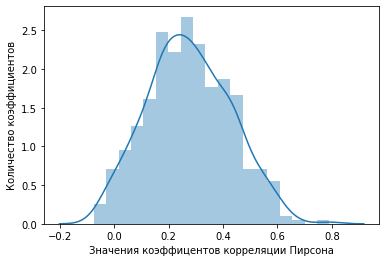

In [39]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

    
sns_plot = sns.distplot(list(x))
sns_plot.set_xlabel("Значения коэффицентов корреляции Пирсона")
sns_plot.set_ylabel("Количество коэффициентов")
fig = sns_plot.get_figure()

In [38]:
x_np = np.array(x)
x_np.mean()

0.27532958652070244

In [13]:
pct_matrix = pct_matrix.fillna(0)

# Знаковые клики

## Нахождение знаковых клик

In [10]:
def get_sign_match_old(stocks, pct_matrix, num_mult_sign=2):
    stock_combinations = list(combinations(stocks, num_mult_sign))
    mult_sign_dict = dict((' '.join(el), 0) for el in stock_combinations)
    for st_mult_sign in stock_combinations:
        tmp_matrix = pct_matrix[list(st_mult_sign)]
        tmp_sign_match = 0
        for index, row in tmp_matrix.iterrows():
            plus = 0
            minus = 0
            for st in row:
                if st > 0:
                    plus += 1
                if st < 0:
                    minus += 1
            if plus == num_mult_sign or minus == num_mult_sign:
                mult_sign_dict[' '.join(st_mult_sign)] += 1
    return mult_sign_dict

In [11]:
def get_sign_match(stocks, pct_matrix, num_mult_sign=2):
    stock_combinations = list(combinations(stocks, num_mult_sign))
    mult_sign_dict = dict((' '.join(el), 0) for el in stock_combinations)
    for st_mult_sign in stock_combinations:
        tmp_matrix = np.sign(pct_matrix[list(st_mult_sign)]).values
        mult_sign_dict[' '.join(st_mult_sign)] = sum((tmp_matrix == tmp_matrix[:, [0]]).all(axis=1))
    return mult_sign_dict

In [12]:
start_time = time.time()
mult_sign_dict = get_sign_match_old(stocks, pct_matrix, 2)
print("Time: %s seconds" % (time.time() - start_time))

Time: 11.675787925720215 seconds


In [13]:
start_time = time.time()
mult_sign_dict = get_sign_match(stocks, pct_matrix, 2)
print("Time: %s seconds" % (time.time() - start_time))

Time: 1.221733570098877 seconds


In [ ]:
all_mult_sign_dict = dict((el, {}) for el in range(2, 11))
start_time = time.time()
for i in range(2, 11):
    cur_time = time.time()
    mult_sign_dict = get_sign_match(stocks, pct_matrix, i)
    print("{}: {} seconds".format(i, (time.time() - cur_time)))
    all_mult_sign_dict[i] = mult_sign_dict
print("\nAll time: %s seconds" % (time.time() - start_time))

In [ ]:
all_mult_sign_dict = dict((el, {}) for el in range(2, 11))
start_time = time.time()
for i in range(2, 9):
    cur_time = time.time()
    mult_sign_dict = get_sign_match(stocks, pct_matrix, i)
    print("{}: {} seconds".format(i, (time.time() - cur_time)))
    all_mult_sign_dict[i] = mult_sign_dict
print("\nAll time: %s seconds" % (time.time() - start_time))

In [12]:
def convert(o):
    return int(o)

In [ ]:
json_dict = json.dumps(all_mult_sign_dict, default=convert)

f = open("all_mult_sign_dict.json","w")
f.write(json_dict)
f.close()

In [5]:
a_file = open("all_mult_sign_dict.json", "r")
output = a_file.read()
a_file.close()
loaded_dict = json.loads(output)

In [6]:
all_mult_sign_dict = loaded_dict

## Топ "знаковых" клик

In [7]:
all_mult_sign_dict_top = {}

for i in all_mult_sign_dict.keys():
    sorted_dict = dict(sorted(all_mult_sign_dict[i].items(), key=lambda item: item[1], reverse=True)[:5])
    if len(sorted_dict):
        min_val = min(sorted_dict.values())
    
    for key, value in all_mult_sign_dict[i].items():
        if value == min_val and key not in sorted_dict:
            sorted_dict[key] = value
    print(i, ": ", sorted_dict)

    all_mult_sign_dict_top[i] = sorted_dict

2 :  {'GS JPM': 212, 'CAT MMM': 191, 'CAT HON': 187, 'AXP V': 183, 'GS MMM': 183}
3 :  {'CAT GS JPM': 161, 'GS JPM MMM': 161, 'GS HON JPM': 157, 'AXP GS JPM': 155, 'CVX GS JPM': 155}
4 :  {'CAT GS JPM MMM': 136, 'CAT GS HON JPM': 133, 'CAT GS HON MMM': 132, 'AXP CAT GS JPM': 130, 'AXP GS JPM MMM': 129, 'CAT GS IBM JPM': 129, 'GS HON JPM MMM': 129}
5 :  {'CAT GS HON JPM MMM': 119, 'CAT GS IBM JPM MMM': 116, 'AXP CAT GS HON JPM': 114, 'AXP CAT GS JPM MMM': 114, 'CAT GS HON IBM JPM': 113, 'CAT GS HON IBM MMM': 113}
6 :  {'CAT GS HON IBM JPM MMM': 105, 'AXP CAT GS HON JPM MMM': 103, 'AXP CAT GS HON IBM MMM': 100, 'AXP CAT GS IBM JPM MMM': 100, 'AXP CAT GS HON IBM JPM': 99, 'CAT CVX GS HON JPM MMM': 99, 'CAT GS HON INTC JPM MMM': 99}
7 :  {'AXP CAT GS HON IBM JPM MMM': 93, 'CAT CVX GS HON IBM JPM MMM': 89, 'AXP CAT CSCO GS HON JPM MMM': 88, 'CAT GS HON IBM INTC JPM MMM': 88, 'AXP CAT CSCO GS HON IBM JPM': 87, 'AXP CAT CSCO GS IBM JPM MMM': 87, 'AXP CAT CVX GS HON JPM MMM': 87, 'CAT CSCO GS 

In [12]:
for i in all_mult_sign_dict_top.keys():
    print(i)
    for k, v in all_mult_sign_dict_top[i].items():
        print("     '{}': {}".format(k, v / n_days))

2
     'GS JPM': 0.8379446640316206
     'CAT MMM': 0.7549407114624506
     'CAT HON': 0.7391304347826086
     'AXP V': 0.7233201581027668
     'GS MMM': 0.7233201581027668
3
     'CAT GS JPM': 0.6363636363636364
     'GS JPM MMM': 0.6363636363636364
     'GS HON JPM': 0.6205533596837944
     'AXP GS JPM': 0.6126482213438735
     'CVX GS JPM': 0.6126482213438735
4
     'CAT GS JPM MMM': 0.5375494071146245
     'CAT GS HON JPM': 0.525691699604743
     'CAT GS HON MMM': 0.5217391304347826
     'AXP CAT GS JPM': 0.5138339920948617
     'AXP GS JPM MMM': 0.5098814229249012
     'CAT GS IBM JPM': 0.5098814229249012
     'GS HON JPM MMM': 0.5098814229249012
5
     'CAT GS HON JPM MMM': 0.47035573122529645
     'CAT GS IBM JPM MMM': 0.45849802371541504
     'AXP CAT GS HON JPM': 0.4505928853754941
     'AXP CAT GS JPM MMM': 0.4505928853754941
     'CAT GS HON IBM JPM': 0.44664031620553357
     'CAT GS HON IBM MMM': 0.44664031620553357
6
     'CAT GS HON IBM JPM MMM': 0.4150197628458498
     '

# Клики по корреляции Пирсона

In [11]:
from networkx.algorithms import clique

def get_cliques(matrix, thresholds):
    cor_matrix_threshold = {}
    stocks = matrix.index.values
    cliques_threshold_dict = {}

    for tr in thresholds:
        cor_matrix_threshold = matrix[matrix >= tr]
        cor_matrix_threshold.values[[np.arange(cor_matrix_threshold.shape[0])]*2] = 0
        cor_matrix_threshold = cor_matrix_threshold.fillna(0)
        #cor_matrix_np = np.asmatrix(cor_matrix_threshold)
        #G = nx.Graph()
        #G = nx.from_numpy_matrix(cor_matrix_np)
        G = nx.from_pandas_adjacency(cor_matrix_threshold)
        #G = nx.relabel_nodes(G,lambda x: stocks[x])
        G.edges(data=True)
        cliques = clique.find_cliques(G)
        cliques_list = [cl for cl in cliques]
        lengths = [len(cl) for cl in cliques_list]
        max_size = max(lengths)
        max_cliques = [cl for cl in cliques_list if len(cl) == max_size]
        cliques_threshold_dict[tr] = max_cliques
        
        '''print(tr)
        cor_matrix_threshold = matrix[matrix >= tr]
        cor_matrix_threshold.values[[np.arange(cor_matrix_threshold.shape[0])]*2] = 0
        cor_matrix_threshold = cor_matrix_threshold.fillna(0)
        
        cor_matrix_np = np.asmatrix(cor_matrix_threshold)
        G = nx.from_numpy_matrix(cor_matrix_np)

        G = nx.relabel_nodes(G,lambda x: stocks[x])

        G.edges(data=True)
        cliques = clique.max_clique(G)
        cliques_threshold_dict[tr] = cliques'''
        
    return cliques_threshold_dict

def print_cliques(cliques_threshold_dict):
    for tr in cliques_threshold_dict.keys():
        print("Threshold", tr)
        for cl in cliques_threshold_dict[tr]:
            print(cl)

In [12]:
thresholds = [0.3, 0.4, 0.5]

cliques_threshold_dict = get_cliques(cor_matrix, thresholds)
print_cliques(cliques_threshold_dict)

Threshold 0.3
['AXP', 'HON', 'NKE', 'JPM', 'CSCO', 'AAPL', 'CAT', 'IBM', 'GS', 'MMM', 'CVX', 'INTC', 'HD', 'V']
Threshold 0.4
['HON', 'AXP', 'JPM', 'AAPL', 'CAT', 'GS', 'MMM', 'IBM', 'INTC']
['HON', 'AXP', 'JPM', 'AAPL', 'CAT', 'GS', 'MMM', 'IBM', 'NKE']
['HON', 'DOW', 'GS', 'CAT', 'JPM', 'AAPL', 'MMM', 'INTC', 'IBM']
Threshold 0.5
['HON', 'AXP', 'GS', 'CAT', 'JPM']


C:\Users\dimse\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  # Remove the CWD from sys.path while we load stuff.


# Знаковые клики с вычетом среднего

## Нахождение знаковых клик

In [1]:
avg_data = data.copy()
avg_data = avg_data.fillna(0)
avg_pct_matrix = avg_data.pct_change()

NameError: name 'data' is not defined

In [2]:
for col in avg_pct_matrix.columns:
    mean = avg_pct_matrix[col].mean()
    avg_pct_matrix[col] = avg_pct_matrix[col].apply(lambda x: x - mean)

NameError: name 'avg_pct_matrix' is not defined

In [3]:
avg_all_mult_sign_dict = dict((el, {}) for el in range(2, 11))
start_time = time.time()
for i in range(2, 9):
    cur_time = time.time()
    mult_sign_dict = get_sign_match(stocks, avg_pct_matrix, i)
    print("{}: {} seconds".format(i, (time.time() - cur_time)))
    avg_all_mult_sign_dict[i] = mult_sign_dict
print("\nAll time: %s seconds" % (time.time() - start_time))

NameError: name 'time' is not defined

In [4]:
avg_all_mult_sign_dict

{2: {}, 3: {}, 4: {}, 5: {}, 6: {}, 7: {}, 8: {}, 9: {}, 10: {}}

In [5]:
#json_dict = json.dumps(avg_all_mult_sign_dict, default=convert)

#f = open("usa_avg_all_mult_sign_dict.json","w")
#f.write(json_dict)
#f.close()

In [8]:
a_file = open("usa_avg_all_mult_sign_dict.json", "r")
output = a_file.read()
#a_file.close()
loaded_dict = json.loads(output)

In [9]:
avg_all_mult_sign_dict = loaded_dict

## Топ "знаковых" клик

In [10]:
avg_all_mult_sign_dict_top = {}

for i in avg_all_mult_sign_dict.keys():
    sorted_dict = dict(sorted(avg_all_mult_sign_dict[i].items(), key=lambda item: item[1], reverse=True)[:5])
    if len(sorted_dict):
        min_val = min(sorted_dict.values())
    
    for key, value in avg_all_mult_sign_dict[i].items():
        if value == min_val and key not in sorted_dict:
            sorted_dict[key] = value
    print(i, ": ", sorted_dict)

    avg_all_mult_sign_dict_top[i] = sorted_dict

2 :  {'GS JPM': 216, 'CAT MMM': 194, 'CAT HON': 188, 'AXP V': 187, 'CAT JPM': 186}
3 :  {'CAT GS JPM': 167, 'GS JPM MMM': 163, 'CAT GS MMM': 155, 'CAT HON MMM': 155, 'GS HON JPM': 155}
4 :  {'CAT GS JPM MMM': 139, 'CAT GS HON JPM': 133, 'AXP CAT GS JPM': 129, 'CAT GS HON MMM': 129, 'CAT HON JPM MMM': 129}
5 :  {'CAT GS HON JPM MMM': 117, 'AXP CAT GS JPM MMM': 112, 'CAT GS JPM MMM WBA': 112, 'AXP CAT GS HON JPM': 111, 'CAT GS IBM JPM MMM': 111}
6 :  {'AXP CAT GS HON JPM MMM': 98, 'CAT GS HON IBM JPM MMM': 98, 'CAT GS IBM JPM MMM WBA': 96, 'CAT CVX GS HON JPM MMM': 95, 'CAT GS HON JPM MMM NKE': 95, 'CAT GS HON JPM MMM WBA': 95}
7 :  {'CAT GS HON IBM JPM MMM WBA': 85, 'AXP CAT GS HON IBM JPM MMM': 84, 'CAT CSCO GS IBM JPM MMM WBA': 82, 'CAT CVX GS HON INTC JPM MMM': 82, 'CAT GS HON IBM INTC JPM MMM': 82, 'CAT GS HON IBM JPM MMM NKE': 82, 'CAT GS HON JPM MMM NKE WBA': 82}
8 :  {'CAT GS HON IBM JPM MMM NKE WBA': 75, 'AXP CAT GS HON IBM JPM MMM WBA': 73, 'CAT GS HON IBM INTC JPM MMM WBA': 73

In [11]:
for i in avg_all_mult_sign_dict_top.keys():
    print(i)
    for k, v in avg_all_mult_sign_dict_top[i].items():
        print("     '{}': {}".format(k, v / n_days))

2
     'GS JPM': 0.8537549407114624
     'CAT MMM': 0.766798418972332
     'CAT HON': 0.7430830039525692
     'AXP V': 0.7391304347826086
     'CAT JPM': 0.7351778656126482
3
     'CAT GS JPM': 0.6600790513833992
     'GS JPM MMM': 0.6442687747035574
     'CAT GS MMM': 0.6126482213438735
     'CAT HON MMM': 0.6126482213438735
     'GS HON JPM': 0.6126482213438735
4
     'CAT GS JPM MMM': 0.549407114624506
     'CAT GS HON JPM': 0.525691699604743
     'AXP CAT GS JPM': 0.5098814229249012
     'CAT GS HON MMM': 0.5098814229249012
     'CAT HON JPM MMM': 0.5098814229249012
5
     'CAT GS HON JPM MMM': 0.4624505928853755
     'AXP CAT GS JPM MMM': 0.4426877470355731
     'CAT GS JPM MMM WBA': 0.4426877470355731
     'AXP CAT GS HON JPM': 0.43873517786561267
     'CAT GS IBM JPM MMM': 0.43873517786561267
6
     'AXP CAT GS HON JPM MMM': 0.38735177865612647
     'CAT GS HON IBM JPM MMM': 0.38735177865612647
     'CAT GS IBM JPM MMM WBA': 0.3794466403162055
     'CAT CVX GS HON JPM MMM': 0.37

# Пирсон arcsin

In [27]:
def arcsin(x):
    return 1/2 + (1/np.pi) * np.arcsin(x)

arcsin_cor_matrix = cor_matrix.apply(arcsin)

In [28]:
diff = sign_matrix - arcsin_cor_matrix

In [29]:
diff

,AAPL,AMGN,AXP,BA,CAT,CRM,CSCO,CVX,DIS,DOW,...,MMM,MRK,NKE,PG,TRV,UNH,V,VZ,WBA,WMT
AAPL,0.000000,-0.008968,0.009056,-0.031362,-0.048244,-0.037400,0.018443,0.032531,0.025595,-0.129012,...,-0.011921,-0.027334,-0.015849,-0.015889,-0.030432,-0.005809,-0.017100,0.003420,0.009614,0.045228
AMGN,-0.008968,0.000000,0.052995,-0.002585,0.041931,0.052468,0.046240,0.070208,0.051243,-0.088500,...,0.101955,0.025881,0.011569,0.013632,0.013715,0.078696,0.042406,0.032521,0.034354,0.033336
AXP,0.009056,0.052995,0.000000,-0.012925,0.040688,-0.009837,0.043478,0.012242,0.058486,-0.123589,...,0.038532,0.022485,-0.051260,-0.033628,-0.000995,0.011540,-0.000494,0.018724,-0.002775,0.014735
BA,-0.031362,-0.002585,-0.012925,0.000000,0.015921,-0.004446,0.050976,-0.010724,0.048874,-0.113546,...,0.046884,0.024586,0.006589,0.009960,0.000931,0.040547,-0.055662,0.010075,-0.015744,-0.027700
CAT,-0.048244,0.041931,0.040688,0.015921,0.000000,-0.031877,0.020666,0.028609,0.058694,-0.157754,...,0.053855,0.016146,0.046429,0.017975,0.004417,0.035387,-0.002494,0.035023,0.041998,0.043313
CRM,-0.037400,0.052468,-0.009837,-0.004446,-0.031877,0.000000,0.007845,-0.018977,0.044305,-0.099566,...,0.047251,0.003035,-0.062485,0.005706,0.021678,0.036826,0.006124,0.030055,0.011087,-0.011355
CSCO,0.018443,0.046240,0.043478,0.050976,0.020666,0.007845,0.000000,0.017404,0.077948,-0.124570,...,0.006226,-0.021000,-0.011374,0.024521,-0.022202,0.060693,-0.003598,0.007909,0.070778,0.059783
CVX,0.032531,0.070208,0.012242,-0.010724,0.028609,-0.018977,0.017404,0.000000,0.087070,-0.115166,...,0.059732,-0.001043,0.020461,-0.030354,0.014471,-0.016801,0.007065,-0.000477,0.020649,0.052403
DIS,0.025595,0.051243,0.058486,0.048874,0.058694,0.044305,0.077948,0.087070,0.000000,-0.128893,...,0.056170,0.012802,0.049410,-0.007710,0.032335,0.063055,0.039193,0.061491,0.058741,0.035743
DOW,-0.129012,-0.088500,-0.123589,-0.113546,-0.157754,-0.099566,-0.124570,-0.115166,-0.128893,0.000000,...,-0.128130,-0.091348,-0.176945,-0.115365,-0.075586,-0.084926,-0.093393,-0.072402,-0.092580,-0.100368


In [30]:
max_values = []
min_values = []
for col in diff.columns:
    column = diff[col]
    max_values.append(column.max())
    min_values.append(column.min())
print("Max: ", max(max_values))
print("Min: ", min(min_values))

Max:  0.10195497154445032
Min:  -0.1769447444881646


In [31]:
diff['MMM'].hist()

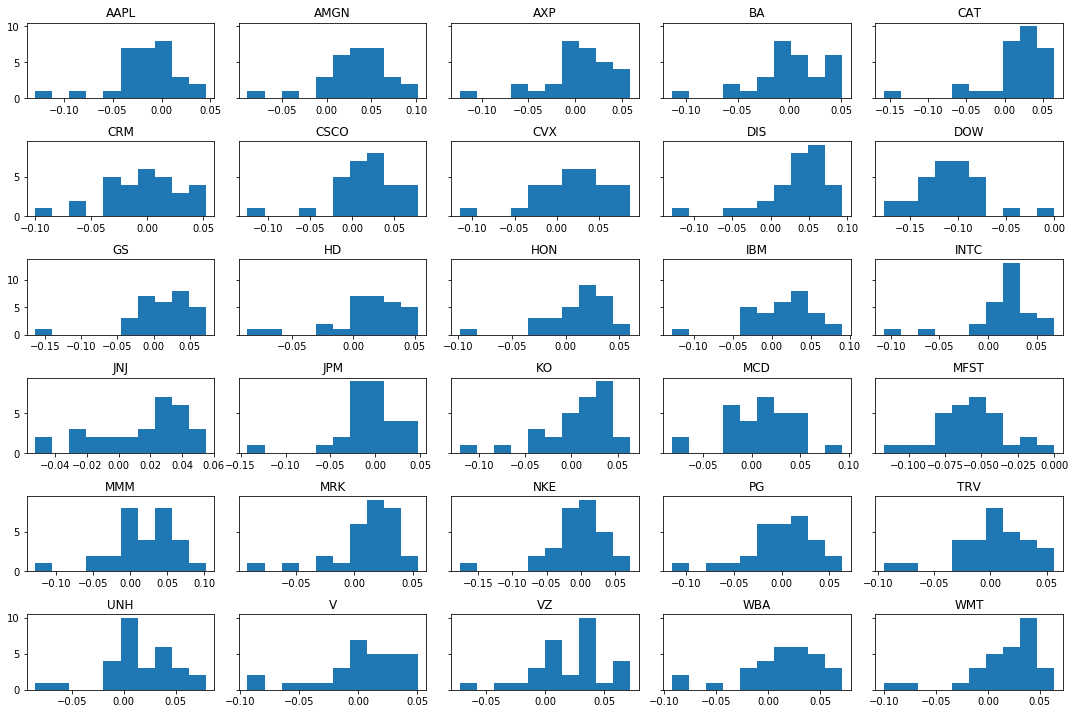

In [32]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(nrows=6, ncols=5, sharey='row', figsize=(15,10))

cols = diff.columns
i = 0 
for ax_ar in axs:
    for ax in ax_ar:
        ax.hist(diff[cols[i]])
        ax.set_title(cols[i])
        i=i+1
fig.tight_layout(pad=1.0)

In [33]:
diff = avg_sign_matrix - arcsin_cor_matrix

NameError: name 'avg_sign_matrix' is not defined

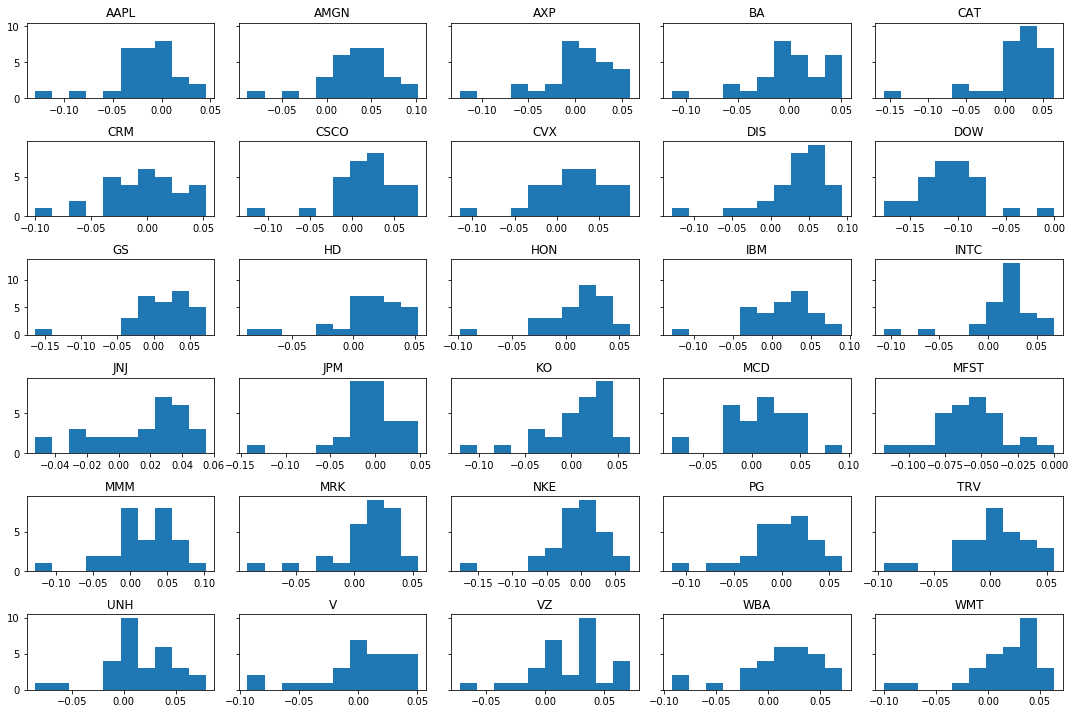

In [38]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(nrows=6, ncols=5, sharey='row', figsize=(15,10))

cols = diff.columns
i = 0 
for ax_ar in axs:
    for ax in ax_ar:
        ax.hist(diff[cols[i]])
        ax.set_title(cols[i])
        i=i+1
fig.tight_layout(pad=1.0)

In [39]:
arcsin_thresholds = []
for tr in thresholds:
    arcsin_thresholds.append(1/2 + (1/np.pi) * np.arcsin(tr))
cor_cliques_threshold_dict = get_cliques(arcsin_cor_matrix, arcsin_thresholds)
print_cliques(cor_cliques_threshold_dict)

Threshold 0.5969866840206783
['AXP', 'HON', 'NKE', 'JPM', 'CSCO', 'AAPL', 'CAT', 'IBM', 'GS', 'MMM', 'CVX', 'INTC', 'HD', 'V']
Threshold 0.6309898804344547
['HON', 'AXP', 'JPM', 'AAPL', 'CAT', 'GS', 'MMM', 'IBM', 'INTC']
['HON', 'AXP', 'JPM', 'AAPL', 'CAT', 'GS', 'MMM', 'IBM', 'NKE']
['HON', 'DOW', 'GS', 'CAT', 'JPM', 'AAPL', 'MMM', 'INTC', 'IBM']
Threshold 0.6666666666666667
['HON', 'AXP', 'GS', 'CAT', 'JPM']


C:\Users\dimse\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  # Remove the CWD from sys.path while we load stuff.


In [40]:
print_cliques(cliques_threshold_dict)

Threshold 0.3
['AXP', 'HON', 'NKE', 'JPM', 'CSCO', 'AAPL', 'CAT', 'IBM', 'GS', 'MMM', 'CVX', 'INTC', 'HD', 'V']
Threshold 0.4
['HON', 'AXP', 'JPM', 'AAPL', 'CAT', 'GS', 'MMM', 'IBM', 'INTC']
['HON', 'AXP', 'JPM', 'AAPL', 'CAT', 'GS', 'MMM', 'IBM', 'NKE']
['HON', 'DOW', 'GS', 'CAT', 'JPM', 'AAPL', 'MMM', 'INTC', 'IBM']
Threshold 0.5
['HON', 'AXP', 'GS', 'CAT', 'JPM']


In [41]:
l = (sign_matrix - avg_sign_matrix).mean()
for i in range(0, 10):
    print("{} {} {}".format(l[i], l[i + 1], l[i + 2]))

NameError: name 'avg_sign_matrix' is not defined

In [ ]:
(sign_matrix - avg_sign_matrix).mean()

# Верояности двух знаков и arcsin

In [ ]:
def get_sign_matrix(cor_matrix, cl):
    sign_cor = cor_matrix.copy()
    for v1 in cl:
        for v2 in cl:
            if v1 != v2:
                ver1, ver2 = '{} {}'.format(v1, v2), '{} {}'.format(v2, v1)
                val = all_mult_sign_dict['2'][ver1] if ver1 in all_mult_sign_dict['2'] else all_mult_sign_dict['2'][ver2]
                sign_cor.loc[v1, v2] = val / n_days
    return sign_cor

In [ ]:
sign_matrix = get_sign_matrix(cor_matrix, stocks)

In [ ]:
sign_cliques_threshold_dict = get_cliques(sign_matrix, arcsin_thresholds)
print_cliques(sign_cliques_threshold_dict)

In [42]:
['HON', 'AXP', 'JPM', 'GS', 'CAT']

['HON', 'AXP', 'JPM', 'GS', 'CAT']

# Вероятности двух знаков c вычетом среднего и arcsin

In [43]:
def get_avg_sign_matrix(cor_matrix, cl):
    sign_cor = cor_matrix.copy()
    for v1 in cl:
        for v2 in cl:
            if v1 != v2:
                ver1, ver2 = '{} {}'.format(v1, v2), '{} {}'.format(v2, v1)
                val = avg_all_mult_sign_dict['2'][ver1] if ver1 in avg_all_mult_sign_dict['2'] else avg_all_mult_sign_dict['2'][ver2]
                sign_cor.loc[v1, v2] = val / n_days
    return sign_cor

In [44]:
avg_sign_matrix = get_avg_sign_matrix(cor_matrix, stocks)

In [45]:
avg_sign_cliques_threshold_dict = get_cliques(avg_sign_matrix, arcsin_thresholds)
print_cliques(avg_sign_cliques_threshold_dict)

Threshold 0.5969866840206783
['HON', 'IBM', 'CSCO', 'INTC', 'MMM', 'AXP', 'GS', 'AAPL', 'CVX', 'JPM', 'CAT', 'NKE', 'WBA']
['HON', 'IBM', 'CSCO', 'INTC', 'MMM', 'AXP', 'GS', 'HD', 'CVX', 'JPM', 'CAT', 'NKE', 'WBA']
Threshold 0.6309898804344547
['AXP', 'HON', 'CAT', 'CVX', 'INTC', 'MMM', 'JPM', 'IBM', 'GS']
Threshold 0.6666666666666667
['CAT', 'MMM', 'AXP', 'HON', 'GS', 'JPM']


C:\Users\dimse\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  # Remove the CWD from sys.path while we load stuff.


In [48]:
print_cliques(avg_sign_cliques_threshold_dict)

Threshold 0.5969866840206783
['HON', 'IBM', 'CSCO', 'INTC', 'MMM', 'AXP', 'GS', 'AAPL', 'CVX', 'JPM', 'CAT', 'NKE', 'WBA']
['HON', 'IBM', 'CSCO', 'INTC', 'MMM', 'AXP', 'GS', 'HD', 'CVX', 'JPM', 'CAT', 'NKE', 'WBA']
Threshold 0.6309898804344547
['AXP', 'HON', 'CAT', 'CVX', 'INTC', 'MMM', 'JPM', 'IBM', 'GS']
Threshold 0.6666666666666667
['CAT', 'MMM', 'AXP', 'HON', 'GS', 'JPM']


In [49]:
print_cliques(cliques_threshold_dict)

Threshold 0.3
['AXP', 'HON', 'NKE', 'JPM', 'CSCO', 'AAPL', 'CAT', 'IBM', 'GS', 'MMM', 'CVX', 'INTC', 'HD', 'V']
Threshold 0.4
['HON', 'AXP', 'JPM', 'AAPL', 'CAT', 'GS', 'MMM', 'IBM', 'INTC']
['HON', 'AXP', 'JPM', 'AAPL', 'CAT', 'GS', 'MMM', 'IBM', 'NKE']
['HON', 'DOW', 'GS', 'CAT', 'JPM', 'AAPL', 'MMM', 'INTC', 'IBM']
Threshold 0.5
['HON', 'AXP', 'GS', 'CAT', 'JPM']


# Хабы

In [50]:
def get_hubs(matrix, thresholds):
    stocks = matrix.index.values
    hubs = {}
    
    for tr in thresholds:
        cor_matrix_threshold = matrix[matrix >= tr]
        cor_matrix_threshold.values[[np.arange(cor_matrix_threshold.shape[0])]*2] = 0
        cor_matrix_threshold = cor_matrix_threshold.fillna(0)
        G = nx.from_pandas_adjacency(cor_matrix_threshold)
        G.edges(data=True)
        degrees = dict(G.degree())
        print("Threshold", tr)
        hubs = {k: v for k, v in sorted(degrees.items(), key=lambda item: item[1], reverse=True)}
        print(hubs)

Корреляция Пирсона

In [51]:
hubs = get_hubs(cor_matrix, thresholds)

Threshold 0.3
{'AXP': 25, 'HON': 24, 'V': 22, 'NKE': 20, 'CSCO': 19, 'IBM': 19, 'JPM': 19, 'AAPL': 17, 'CAT': 17, 'GS': 16, 'HD': 16, 'MMM': 15, 'CVX': 14, 'INTC': 14, 'CRM': 13, 'DOW': 13, 'MRK': 11, 'TRV': 10, 'WBA': 10, 'WMT': 10, 'BA': 8, 'MCD': 8, 'PG': 8, 'DIS': 7, 'KO': 5, 'AMGN': 4, 'JNJ': 4, 'VZ': 2, 'MFST': 0, 'UNH': 0}
Threshold 0.4
{'AXP': 15, 'HON': 15, 'JPM': 15, 'AAPL': 14, 'CAT': 14, 'GS': 12, 'IBM': 12, 'INTC': 12, 'NKE': 11, 'V': 11, 'CSCO': 10, 'MMM': 10, 'DOW': 9, 'HD': 9, 'CVX': 6, 'TRV': 5, 'CRM': 4, 'MRK': 2, 'AMGN': 1, 'BA': 1, 'DIS': 1, 'KO': 1, 'MCD': 1, 'PG': 1, 'JNJ': 0, 'MFST': 0, 'UNH': 0, 'VZ': 0, 'WBA': 0, 'WMT': 0}
Threshold 0.5
{'HON': 10, 'AXP': 9, 'CAT': 7, 'JPM': 7, 'AAPL': 6, 'CSCO': 5, 'GS': 5, 'V': 5, 'NKE': 4, 'DOW': 3, 'IBM': 3, 'MMM': 3, 'TRV': 2, 'CRM': 1, 'INTC': 1, 'MCD': 1, 'AMGN': 0, 'BA': 0, 'CVX': 0, 'DIS': 0, 'HD': 0, 'JNJ': 0, 'KO': 0, 'MFST': 0, 'MRK': 0, 'PG': 0, 'UNH': 0, 'VZ': 0, 'WBA': 0, 'WMT': 0}


C:\Users\dimse\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  import sys


Знаковая матрица без вычета среднего

In [52]:
get_hubs(sign_matrix, arcsin_thresholds)

Threshold 0.5969866840206783
{'HON': 25, 'V': 25, 'DIS': 24, 'AXP': 22, 'CSCO': 22, 'IBM': 21, 'CAT': 20, 'HD': 20, 'MMM': 20, 'INTC': 19, 'NKE': 19, 'JPM': 18, 'WMT': 18, 'AAPL': 17, 'CVX': 17, 'GS': 17, 'AMGN': 16, 'WBA': 15, 'CRM': 14, 'TRV': 14, 'MRK': 13, 'JNJ': 12, 'MCD': 11, 'KO': 10, 'PG': 10, 'VZ': 10, 'BA': 8, 'UNH': 7, 'DOW': 0, 'MFST': 0}
Threshold 0.6309898804344547
{'AXP': 21, 'HON': 19, 'CSCO': 17, 'IBM': 16, 'V': 16, 'MMM': 15, 'CAT': 14, 'GS': 14, 'NKE': 14, 'CVX': 13, 'HD': 12, 'INTC': 12, 'JPM': 12, 'AMGN': 11, 'AAPL': 9, 'DIS': 9, 'TRV': 9, 'MRK': 8, 'WMT': 8, 'CRM': 6, 'MCD': 6, 'WBA': 6, 'KO': 4, 'BA': 3, 'JNJ': 3, 'PG': 3, 'UNH': 2, 'VZ': 2, 'DOW': 0, 'MFST': 0}
Threshold 0.6666666666666667
{'HON': 13, 'AXP': 12, 'CAT': 11, 'IBM': 10, 'INTC': 8, 'MMM': 8, 'CSCO': 7, 'GS': 7, 'CVX': 6, 'JPM': 6, 'V': 5, 'AAPL': 4, 'HD': 4, 'AMGN': 3, 'DIS': 3, 'NKE': 3, 'WBA': 3, 'MCD': 2, 'CRM': 1, 'KO': 1, 'MRK': 1, 'PG': 1, 'TRV': 1, 'BA': 0, 'DOW': 0, 'JNJ': 0, 'MFST': 0, 'UNH

C:\Users\dimse\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  import sys


Знаковая матрица с вычетом среднего

In [53]:
get_hubs(avg_sign_matrix, arcsin_thresholds)

Threshold 0.5969866840206783
{'HON': 25, 'IBM': 24, 'AXP': 23, 'CSCO': 21, 'INTC': 20, 'MMM': 20, 'NKE': 20, 'CAT': 19, 'V': 19, 'CVX': 18, 'GS': 17, 'JPM': 17, 'HD': 16, 'AMGN': 15, 'AAPL': 14, 'DIS': 14, 'WBA': 14, 'WMT': 14, 'TRV': 13, 'CRM': 12, 'MRK': 12, 'JNJ': 11, 'KO': 10, 'MCD': 10, 'BA': 9, 'PG': 9, 'DOW': 8, 'VZ': 8, 'UNH': 6, 'MFST': 0}
Threshold 0.6309898804344547
{'AXP': 20, 'HON': 18, 'CAT': 16, 'IBM': 15, 'CSCO': 13, 'INTC': 13, 'JPM': 13, 'MMM': 13, 'NKE': 12, 'GS': 11, 'V': 11, 'AAPL': 10, 'CVX': 10, 'HD': 10, 'TRV': 9, 'DIS': 7, 'MRK': 7, 'WBA': 7, 'CRM': 6, 'KO': 6, 'MCD': 6, 'AMGN': 4, 'JNJ': 4, 'BA': 3, 'DOW': 3, 'VZ': 3, 'WMT': 3, 'PG': 2, 'UNH': 1, 'MFST': 0}
Threshold 0.6666666666666667
{'CAT': 12, 'AXP': 11, 'HON': 9, 'MMM': 9, 'IBM': 8, 'INTC': 8, 'JPM': 6, 'CSCO': 5, 'CVX': 5, 'GS': 5, 'V': 5, 'AAPL': 4, 'WBA': 4, 'NKE': 3, 'AMGN': 2, 'DIS': 2, 'TRV': 2, 'CRM': 1, 'DOW': 1, 'KO': 1, 'MCD': 1, 'MRK': 1, 'PG': 1, 'BA': 0, 'HD': 0, 'JNJ': 0, 'MFST': 0, 'UNH': 0

C:\Users\dimse\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  import sys


In [54]:
def get_adj_vertices(vertex, matrix, threshold):
    stocks = matrix.index.values
    adj_vertices = []
    
    cor_matrix_threshold = matrix[matrix >= threshold]
    cor_matrix_threshold.values[[np.arange(cor_matrix_threshold.shape[0])]*2] = 0
    cor_matrix_threshold = cor_matrix_threshold.fillna(0)
    G = nx.from_pandas_adjacency(cor_matrix_threshold)
    for vs in G.edges():
        if vertex in vs:
            adj_vertices.append(vs[0] if vs[0] != vertex else vs[1])
    return adj_vertices

In [55]:
v = get_adj_vertices('HON', cor_matrix, thresholds[2])
v.append("HON")
print(len(v))
m = cor_matrix.loc[v, v]
m

11


C:\Users\dimse\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  


,AAPL,AXP,CAT,CSCO,GS,IBM,JPM,MMM,NKE,V,HON
AAPL,1.000000,0.553208,0.516459,0.528405,0.476406,0.453928,0.455647,0.449184,0.482079,0.538825,0.528792
AXP,0.553208,1.000000,0.521766,0.514269,0.594559,0.508452,0.607813,0.451793,0.545528,0.646612,0.671169
CAT,0.516459,0.521766,1.000000,0.424112,0.563131,0.455524,0.603031,0.590540,0.429521,0.330558,0.610962
CSCO,0.528405,0.514269,0.424112,1.000000,0.397936,0.506972,0.437596,0.397545,0.502266,0.425671,0.544666
GS,0.476406,0.594559,0.563131,0.397936,1.000000,0.438400,0.790796,0.498073,0.465927,0.393906,0.522081
IBM,0.453928,0.508452,0.455524,0.506972,0.438400,1.000000,0.463147,0.461301,0.413502,0.427872,0.532846
JPM,0.455647,0.607813,0.603031,0.437596,0.790796,0.463147,1.000000,0.543038,0.509308,0.406459,0.596347
MMM,0.449184,0.451793,0.590540,0.397545,0.498073,0.461301,0.543038,1.000000,0.415647,0.336790,0.543233
NKE,0.482079,0.545528,0.429521,0.502266,0.465927,0.413502,0.509308,0.415647,1.000000,0.455167,0.551037
V,0.538825,0.646612,0.330558,0.425671,0.393906,0.427872,0.406459,0.336790,0.455167,1.000000,0.504173


In [56]:
v = get_adj_vertices('HON', sign_matrix, arcsin_thresholds[2])
v.append("HON")
print(len(v))
m = sign_matrix.loc[v, v]
m

14


C:\Users\dimse\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  


,AAPL,AXP,CAT,CSCO,CVX,GS,HD,IBM,INTC,JPM,MMM,NKE,V,HON
AAPL,1.000000,0.695652,0.624506,0.695652,0.652174,0.620553,0.612648,0.620553,0.695652,0.644269,0.636364,0.644269,0.664032,0.667984
AXP,0.695652,1.000000,0.715415,0.715415,0.652174,0.695652,0.667984,0.683794,0.683794,0.687747,0.687747,0.632411,0.723320,0.711462
CAT,0.624506,0.715415,1.000000,0.660079,0.675889,0.719368,0.667984,0.715415,0.699605,0.711462,0.754941,0.687747,0.604743,0.739130
CSCO,0.695652,0.715415,0.660079,1.000000,0.640316,0.664032,0.664032,0.687747,0.667984,0.624506,0.636364,0.656126,0.636364,0.707510
CVX,0.652174,0.652174,0.675889,0.640316,1.000000,0.703557,0.648221,0.652174,0.695652,0.679842,0.687747,0.632411,0.616601,0.687747
GS,0.620553,0.695652,0.719368,0.664032,0.703557,1.000000,0.656126,0.679842,0.664032,0.837945,0.723320,0.648221,0.648221,0.703557
HD,0.612648,0.667984,0.667984,0.664032,0.648221,0.656126,1.000000,0.648221,0.624506,0.652174,0.628458,0.667984,0.660079,0.667984
IBM,0.620553,0.683794,0.715415,0.687747,0.652174,0.679842,0.648221,1.000000,0.687747,0.656126,0.707510,0.616601,0.671937,0.691700
INTC,0.695652,0.683794,0.699605,0.667984,0.695652,0.664032,0.624506,0.687747,1.000000,0.656126,0.664032,0.628458,0.679842,0.687747
JPM,0.644269,0.687747,0.711462,0.624506,0.679842,0.837945,0.652174,0.656126,0.656126,1.000000,0.707510,0.648221,0.648221,0.695652


In [57]:
v = get_adj_vertices('HON', avg_sign_matrix, arcsin_thresholds[2])
v.append("HON")
print(len(v))
m = avg_sign_matrix.loc[v, v]
m

10


C:\Users\dimse\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  


,AXP,CAT,CSCO,CVX,GS,IBM,JPM,MMM,NKE,HON
AXP,1.000000,0.719368,0.695652,0.636364,0.671937,0.683794,0.675889,0.691700,0.636364,0.723320
CAT,0.719368,1.000000,0.652174,0.679842,0.731225,0.695652,0.735178,0.766798,0.711462,0.743083
CSCO,0.695652,0.652174,1.000000,0.656126,0.612648,0.664032,0.616601,0.624506,0.624506,0.679842
CVX,0.636364,0.679842,0.656126,1.000000,0.664032,0.636364,0.675889,0.691700,0.628458,0.691700
GS,0.671937,0.731225,0.612648,0.664032,1.000000,0.640316,0.853755,0.727273,0.624506,0.671937
IBM,0.683794,0.695652,0.664032,0.636364,0.640316,1.000000,0.636364,0.707510,0.644269,0.667984
JPM,0.675889,0.735178,0.616601,0.675889,0.853755,0.636364,1.000000,0.707510,0.660079,0.699605
MMM,0.691700,0.766798,0.624506,0.691700,0.727273,0.707510,0.707510,1.000000,0.628458,0.715415
NKE,0.636364,0.711462,0.624506,0.628458,0.624506,0.644269,0.660079,0.628458,1.000000,0.707510
HON,0.723320,0.743083,0.679842,0.691700,0.671937,0.667984,0.699605,0.715415,0.707510,1.000000


# Гиперграф

In [16]:
hipergraph_edges = {}
for num in all_mult_sign_dict.keys():
    hipergraph_edges[int(num)] = {}
    for ver in all_mult_sign_dict[num].keys():
        tuple_ver = tuple(sorted(ver.split()))
        hipergraph_edges[int(num)][tuple_ver] = all_mult_sign_dict[num][ver] / n_days

In [17]:
def get_cliques_from_hipergraph(hipergraph_edges, edge_size, threshold):    
    hipergraph_edges_threshold = {}
    for ver in hipergraph_edges:
        if hipergraph_edges[ver] >= threshold:
            hipergraph_edges_threshold[ver] = hipergraph_edges[ver]
    cliques = []
    stock_combinations = list(combinations(stocks, edge_size + 1))
    for big_comb in stock_combinations:
        small_combinations = list(combinations(big_comb, edge_size))
        is_clique = True
        for small_comb in small_combinations:
            cur_three = tuple(sorted(small_comb))
            if cur_three not in hipergraph_edges_threshold:
                is_clique = False
                break
        if is_clique:
            cliques.append(big_comb)
    return cliques

In [41]:
def print_hipergraph_edges(hipergraph_edges, clique):
    n = len(clique) - 1
    edges = list(combinations(clique, n))
    for e in edges:
        print('{}: {}'.format(sorted(e), hipergraph_edges[n][tuple(sorted(e))]))
    print("\n")

In [46]:
cliques = get_cliques_from_hipergraph(hipergraph_edges[4], 4, 0.5)
for cl in cliques:
    print("Clique {} :{}".format(cl, hipergraph_edges[len(cl)][cl]))
    print_hipergraph_edges(hipergraph_edges, cl)

Clique ('CAT', 'GS', 'HON', 'JPM', 'MMM') :0.47035573122529645
['CAT', 'GS', 'HON', 'JPM']: 0.525691699604743
['CAT', 'GS', 'HON', 'MMM']: 0.5217391304347826
['CAT', 'GS', 'JPM', 'MMM']: 0.5375494071146245
['CAT', 'HON', 'JPM', 'MMM']: 0.5059288537549407
['GS', 'HON', 'JPM', 'MMM']: 0.5098814229249012




In [45]:
cliques = get_cliques_from_hipergraph(hipergraph_edges[3], 3, 0.55)
for cl in cliques:
    print("Clique: {}".format(cl))
    print_hipergraph_edges(hipergraph_edges, cl)

Clique: ('AXP', 'CAT', 'GS', 'HON')
['AXP', 'CAT', 'GS']: 0.5652173913043478
['AXP', 'CAT', 'HON']: 0.5849802371541502
['AXP', 'GS', 'HON']: 0.5573122529644269
['CAT', 'GS', 'HON']: 0.5810276679841897


Clique: ('AXP', 'CAT', 'GS', 'JPM')
['AXP', 'CAT', 'GS']: 0.5652173913043478
['AXP', 'CAT', 'JPM']: 0.5573122529644269
['AXP', 'GS', 'JPM']: 0.6126482213438735
['CAT', 'GS', 'JPM']: 0.6363636363636364


Clique: ('AXP', 'CAT', 'GS', 'MMM')
['AXP', 'CAT', 'GS']: 0.5652173913043478
['AXP', 'CAT', 'MMM']: 0.5810276679841897
['AXP', 'GS', 'MMM']: 0.5573122529644269
['CAT', 'GS', 'MMM']: 0.6007905138339921


Clique: ('AXP', 'CAT', 'HON', 'MMM')
['AXP', 'CAT', 'HON']: 0.5849802371541502
['AXP', 'CAT', 'MMM']: 0.5810276679841897
['AXP', 'HON', 'MMM']: 0.5652173913043478
['CAT', 'HON', 'MMM']: 0.6086956521739131


Clique: ('AXP', 'GS', 'HON', 'MMM')
['AXP', 'GS', 'HON']: 0.5573122529644269
['AXP', 'GS', 'MMM']: 0.5573122529644269
['AXP', 'HON', 'MMM']: 0.5652173913043478
['GS', 'HON', 'MMM']: 0.

In [ ]:
cliques = get_cliques_from_hipergraph(hipergraph_edges[5], 5, 0.4)
for cl in cliques:
    print(cl)

In [ ]:
cliques = get_cliques_from_hipergraph(hipergraph_edges[5], 5, 0.43)
for cl in cliques:
    print(cl)

In [166]:
cliques = get_cliques_from_hipergraph(hipergraph_edges[6], 6, 0.37)
for cl in cliques:
    print(cl)

('AXP', 'CAT', 'GS', 'HON', 'IBM', 'JPM', 'MMM')


In [167]:
cliques = get_cliques_from_hipergraph(hipergraph_edges[7], 7, 0.32)
for cl in cliques:
    print(cl)

('AXP', 'CAT', 'CSCO', 'GS', 'HON', 'IBM', 'JPM', 'MMM')
('AXP', 'CAT', 'CVX', 'GS', 'HON', 'IBM', 'JPM', 'MMM')
('AXP', 'CAT', 'GS', 'HON', 'IBM', 'INTC', 'JPM', 'MMM')
('AXP', 'CAT', 'GS', 'HON', 'IBM', 'JPM', 'MMM', 'V')


# Побочные вычисления

In [41]:
cl_1 = ['CAT', 'GS', 'JPM', 'MMM']
cor_matrix_1 = cor_matrix.loc[cl_1, cl_1]
print(cor_matrix_1)

          CAT        GS       JPM       MMM
CAT  1.000000  0.563131  0.603031  0.590540
GS   0.563131  1.000000  0.790796  0.498073
JPM  0.603031  0.790796  1.000000  0.543038
MMM  0.590540  0.498073  0.543038  1.000000


In [42]:
cl_1 = ['CAT', 'GS', 'HON', 'JPM', 'MMM']
cor_matrix_1 = cor_matrix.loc[cl_1, cl_1]
print(cor_matrix_1)

          CAT        GS       HON       JPM       MMM
CAT  1.000000  0.563131  0.610962  0.603031  0.590540
GS   0.563131  1.000000  0.522081  0.790796  0.498073
HON  0.610962  0.522081  1.000000  0.596347  0.543233
JPM  0.603031  0.790796  0.596347  1.000000  0.543038
MMM  0.590540  0.498073  0.543233  0.543038  1.000000


In [43]:
cl_1 = ['AXP', 'CAT', 'GS', 'HON', 'JPM', 'MMM']
cor_matrix_1 = cor_matrix.loc[cl_1, cl_1]
print(cor_matrix_1)

          AXP       CAT        GS       HON       JPM       MMM
AXP  1.000000  0.521766  0.594559  0.671169  0.607813  0.451793
CAT  0.521766  1.000000  0.563131  0.610962  0.603031  0.590540
GS   0.594559  0.563131  1.000000  0.522081  0.790796  0.498073
HON  0.671169  0.610962  0.522081  1.000000  0.596347  0.543233
JPM  0.607813  0.603031  0.790796  0.596347  1.000000  0.543038
MMM  0.451793  0.590540  0.498073  0.543233  0.543038  1.000000


In [154]:
avg_all_mult_sign_dict['2']['GS MMM']

184

In [155]:
all_mult_sign_dict['2']['GS MMM']

183

In [161]:
all_mult_sign_dict['2']['AXP MMM']

174

In [162]:
avg_all_mult_sign_dict['2']['AXP MMM']

175

In [100]:
cl_1 = ['HON', 'AXP', 'CAT', 'MMM', 'GS', 'IBM']
cor_matrix_1 = sign_matrix.loc[cl_1, cl_1]
print(cor_matrix_1)

          HON       AXP       CAT       MMM        GS       IBM
HON  1.000000  0.711462  0.739130  0.719368  0.703557  0.691700
AXP  0.711462  1.000000  0.715415  0.687747  0.695652  0.683794
CAT  0.739130  0.715415  1.000000  0.754941  0.719368  0.715415
MMM  0.719368  0.687747  0.754941  1.000000  0.723320  0.707510
GS   0.703557  0.695652  0.719368  0.723320  1.000000  0.679842
IBM  0.691700  0.683794  0.715415  0.707510  0.679842  1.000000


In [99]:
cl_1 = ['HON', 'AXP', 'JPM', 'GS', 'CAT']
cor_matrix_1 = sign_matrix.loc[cl_1, cl_1]
print(cor_matrix_1)

          HON       AXP       JPM        GS       CAT
HON  1.000000  0.711462  0.695652  0.703557  0.739130
AXP  0.711462  1.000000  0.687747  0.695652  0.715415
JPM  0.695652  0.687747  1.000000  0.837945  0.711462
GS   0.703557  0.695652  0.837945  1.000000  0.719368
CAT  0.739130  0.715415  0.711462  0.719368  1.000000


In [101]:
cl_1 = ['HON', 'AXP', 'CAT', 'MMM', 'GS', 'IBM']
cor_matrix_1 = cor_matrix.loc[cl_1, cl_1]
print(cor_matrix_1)

          HON       AXP       CAT       MMM        GS       IBM
HON  1.000000  0.671169  0.610962  0.543233  0.522081  0.532845
AXP  0.671169  1.000000  0.521766  0.451793  0.594559  0.508452
CAT  0.610962  0.521766  1.000000  0.590540  0.563131  0.455524
MMM  0.543233  0.451793  0.590540  1.000000  0.498073  0.461301
GS   0.522081  0.594559  0.563131  0.498073  1.000000  0.438399
IBM  0.532845  0.508452  0.455524  0.461301  0.438399  1.000000


In [47]:
from networkx.algorithms import clique

In [85]:
tr = 0.6666666666666667
matrix = sign_matrix.copy()
cor_matrix_threshold = matrix[matrix >= tr]
cor_matrix_threshold.values[[np.arange(cor_matrix_threshold.shape[0])]*2] = 0
cor_matrix_threshold = cor_matrix_threshold.fillna(0)
#cor_matrix_np = np.asmatrix(cor_matrix_threshold)
#G = nx.Graph()
G = nx.from_numpy_matrix(cor_matrix_np)
G = nx.from_pandas_adjacency(cor_matrix_threshold)
#G = nx.relabel_nodes(G,lambda x: stocks[x])
G.edges(data=True)
cliques = clique.find_cliques(G)
cliques_list = [cl for cl in cliques]
lengths = [len(cl) for cl in cliques_list]
max_size = max(lengths)
max_cliques = [cl for cl in cliques_list if len(cl) == max_size]
print(max_cliques)

[['HON', 'AXP', 'CAT', 'MMM', 'GS', 'IBM'], ['HON', 'AXP', 'CAT', 'MMM', 'GS', 'JPM'], ['HON', 'CVX', 'CAT', 'MMM', 'GS', 'JPM']]


C:\Users\dimse\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  after removing the cwd from sys.path.


In [67]:
cl_1 = ['HON', 'AXP', 'CAT', 'MMM', 'GS', 'JPM']
cor_matrix_1 = sign_matrix.loc[cl_1, cl_1]
print(cor_matrix_1)

          HON       AXP       CAT       MMM        GS       JPM
HON  1.000000  0.711462  0.739130  0.719368  0.703557  0.695652
AXP  0.711462  1.000000  0.715415  0.687747  0.695652  0.687747
CAT  0.739130  0.715415  1.000000  0.754941  0.719368  0.711462
MMM  0.719368  0.687747  0.754941  1.000000  0.723320  0.707510
GS   0.703557  0.695652  0.719368  0.723320  1.000000  0.837945
JPM  0.695652  0.687747  0.711462  0.707510  0.837945  1.000000


In [250]:
cl_1 = ['CAT', 'AXP', 'GS', 'HON', 'JPM']
cor_matrix_1 = sign_matrix.loc[cl_1, cl_1]
print(cor_matrix_1)

          CAT       AXP        GS       HON       JPM
CAT  1.000000  0.715415  0.719368  0.739130  0.711462
AXP  0.715415  1.000000  0.695652  0.711462  0.687747
GS   0.719368  0.695652  1.000000  0.703557  0.837945
HON  0.739130  0.711462  0.703557  1.000000  0.695652
JPM  0.711462  0.687747  0.837945  0.695652  1.000000


In [102]:
cl_1 = ['HON', 'AXP', 'CAT', 'MMM', 'GS', 'JPM']
cor_matrix_1 = cor_matrix.loc[cl_1, cl_1]
print(cor_matrix_1)

          HON       AXP       CAT       MMM        GS       JPM
HON  1.000000  0.671169  0.610962  0.543233  0.522081  0.596347
AXP  0.671169  1.000000  0.521766  0.451793  0.594559  0.607813
CAT  0.610962  0.521766  1.000000  0.590540  0.563131  0.603031
MMM  0.543233  0.451793  0.590540  1.000000  0.498073  0.543038
GS   0.522081  0.594559  0.563131  0.498073  1.000000  0.790796
JPM  0.596347  0.607813  0.603031  0.543038  0.790796  1.000000


In [103]:
cl_1 = ['HON', 'CVX', 'CAT', 'MMM', 'GS', 'JPM']
cor_matrix_1 = cor_matrix.loc[cl_1, cl_1]
print(cor_matrix_1)

          HON       CVX       CAT       MMM        GS       JPM
HON  1.000000  0.459222  0.610962  0.543233  0.522081  0.596347
CVX  0.459222  1.000000  0.446363  0.391417  0.401135  0.417622
CAT  0.610962  0.446363  1.000000  0.590540  0.563131  0.603031
MMM  0.543233  0.391417  0.590540  1.000000  0.498073  0.543038
GS   0.522081  0.401135  0.563131  0.498073  1.000000  0.790796
JPM  0.596347  0.417622  0.603031  0.543038  0.790796  1.000000


In [135]:
cl_1 = ['HON', 'CVX', 'CAT', 'MMM', 'GS', 'JPM']
cor_matrix_1 = avg_sign_matrix.loc[cl_1, cl_1]
print(cor_matrix_1)

          HON       CVX       CAT       MMM        GS       JPM
HON  1.000000  0.691700  0.743083  0.715415  0.671937  0.699605
CVX  0.691700  1.000000  0.679842  0.691700  0.664032  0.675889
CAT  0.743083  0.679842  1.000000  0.766798  0.731225  0.735178
MMM  0.715415  0.691700  0.766798  1.000000  0.727273  0.707510
GS   0.671937  0.664032  0.731225  0.727273  1.000000  0.853755
JPM  0.699605  0.675889  0.735178  0.707510  0.853755  1.000000


In [136]:
cl_1 = ['HON', 'CVX', 'CAT', 'MMM', 'GS', 'JPM']
cor_matrix_1 = sign_matrix.loc[cl_1, cl_1]
print(cor_matrix_1)

          HON       CVX       CAT       MMM        GS       JPM
HON  1.000000  0.687747  0.739130  0.719368  0.703557  0.695652
CVX  0.687747  1.000000  0.675889  0.687747  0.703557  0.679842
CAT  0.739130  0.675889  1.000000  0.754941  0.719368  0.711462
MMM  0.719368  0.687747  0.754941  1.000000  0.723320  0.707510
GS   0.703557  0.703557  0.719368  0.723320  1.000000  0.837945
JPM  0.695652  0.679842  0.711462  0.707510  0.837945  1.000000


In [150]:
all_mult_sign_dict_top

{'2': {'GS JPM': 212,
  'CAT MMM': 191,
  'CAT HON': 187,
  'AXP V': 183,
  'GS MMM': 183},
 '3': {'CAT GS JPM': 161,
  'GS JPM MMM': 161,
  'GS HON JPM': 157,
  'AXP GS JPM': 155,
  'CVX GS JPM': 155},
 '4': {'CAT GS JPM MMM': 136,
  'CAT GS HON JPM': 133,
  'CAT GS HON MMM': 132,
  'AXP CAT GS JPM': 130,
  'AXP GS JPM MMM': 129,
  'CAT GS IBM JPM': 129,
  'GS HON JPM MMM': 129},
 '5': {'CAT GS HON JPM MMM': 119,
  'CAT GS IBM JPM MMM': 116,
  'AXP CAT GS HON JPM': 114,
  'AXP CAT GS JPM MMM': 114,
  'CAT GS HON IBM JPM': 113,
  'CAT GS HON IBM MMM': 113},
 '6': {'CAT GS HON IBM JPM MMM': 105,
  'AXP CAT GS HON JPM MMM': 103,
  'AXP CAT GS HON IBM MMM': 100,
  'AXP CAT GS IBM JPM MMM': 100,
  'AXP CAT GS HON IBM JPM': 99,
  'CAT CVX GS HON JPM MMM': 99,
  'CAT GS HON INTC JPM MMM': 99},
 '7': {'AXP CAT GS HON IBM JPM MMM': 93,
  'CAT CVX GS HON IBM JPM MMM': 89,
  'AXP CAT CSCO GS HON JPM MMM': 88,
  'CAT GS HON IBM INTC JPM MMM': 88,
  'AXP CAT CSCO GS HON IBM JPM': 87,
  'AXP CAT CS

Анализ и сравнение полученных клик

In [27]:
def get_sign_matrix(cor_matrix, cl):
    sign_cor = cor_matrix.copy()
    for v1 in cl:
        for v2 in cl:
            if v1 != v2:
                ver1, ver2 = '{} {}'.format(v1, v2), '{} {}'.format(v2, v1)
                val = all_mult_sign_dict['2'][ver1] if ver1 in all_mult_sign_dict['2'] else all_mult_sign_dict['2'][ver2]
                sign_cor.loc[v1, v2] = val / n_days
    return sign_cor

In [38]:
def get_avg_sign_matrix(cor_matrix, cl):
    sign_cor = cor_matrix.copy()
    for v1 in cl:
        for v2 in cl:
            if v1 != v2:
                ver1, ver2 = '{} {}'.format(v1, v2), '{} {}'.format(v2, v1)
                val = avg_all_mult_sign_dict['2'][ver1] if ver1 in avg_all_mult_sign_dict['2'] else avg_all_mult_sign_dict['2'][ver2]
                sign_cor.loc[v1, v2] = val / n_days
    return sign_cor

Клики по корреляции и знаковые клики

In [28]:
for size, dict_top in all_mult_sign_dict_top.items():
    print("Size of sign cliques: {}\n".format(size))
    for sign_cliques, _ in dict_top.items():
        sign_cliques_list = sign_cliques.split()
        for threshold, cliques_threshold in cliques_threshold_dict.items():
            if len(sign_cliques_list) <= len(cliques_threshold):
                if(set(sign_cliques_list).issubset(set(cliques_threshold))): 
                    print("- Threshold {}".format(threshold))
                    print("sign_clique={}".format(sign_cliques_list))
                    print("cliques_threshold={}\n".format(cliques_threshold))
                    
    print("\n")

Size of sign cliques: 2

- Threshold 0.1
sign_clique=['GS', 'JPM']
cliques_threshold={'MMM', 'GS', 'IBM', 'CVX', 'JNJ', 'HON', 'INTC', 'DOW', 'NKE', 'AMGN', 'TRV', 'CSCO', 'WMT', 'WBA', 'BA', 'AAPL', 'CRM', 'AXP', 'JPM', 'V', 'CAT', 'HD'}

- Threshold 0.2
sign_clique=['GS', 'JPM']
cliques_threshold={'MMM', 'AXP', 'JPM', 'GS', 'NKE', 'HD', 'V', 'CSCO', 'WBA', 'HON', 'CAT', 'INTC', 'IBM', 'DOW', 'AAPL', 'CVX', 'CRM'}

- Threshold 0.4
sign_clique=['GS', 'JPM']
cliques_threshold={'MMM', 'AXP', 'JPM', 'GS', 'NKE', 'HON', 'CAT', 'IBM', 'AAPL'}

- Threshold 0.5
sign_clique=['GS', 'JPM']
cliques_threshold={'AXP', 'GS', 'JPM', 'HON', 'CAT'}

- Threshold 0.1
sign_clique=['CAT', 'MMM']
cliques_threshold={'MMM', 'GS', 'IBM', 'CVX', 'JNJ', 'HON', 'INTC', 'DOW', 'NKE', 'AMGN', 'TRV', 'CSCO', 'WMT', 'WBA', 'BA', 'AAPL', 'CRM', 'AXP', 'JPM', 'V', 'CAT', 'HD'}

- Threshold 0.2
sign_clique=['CAT', 'MMM']
cliques_threshold={'MMM', 'AXP', 'JPM', 'GS', 'NKE', 'HD', 'V', 'CSCO', 'WBA', 'HON', 'CAT', 'INTC',

**Клики по корреляции**

Treshold 0.1\
{'CVX', 'GS', 'AXP', 'CRM', 'MMM', 'DOW', 'TRV', 'CAT', 'AAPL', 'JPM', 'WBA', 'IBM', 'HON', 'NKE', 'BA', 'JNJ', 'V', 'INTC', 'HD', 'CSCO', 'WMT', 'AMGN'}\
Treshold 0.2\
{'AXP', 'IBM', 'CAT', 'V', 'HON', 'CVX', 'GS', 'INTC', 'HD', 'NKE', 'DOW', 'CSCO', 'BA', 'CRM', 'MMM', 'JPM'}\
Treshold 0.3\
{'IBM', 'V', 'AAPL', 'CVX', 'INTC', 'HD', 'NKE', 'CSCO', 'AXP', 'MMM'}\
Treshold 0.4\
{'IBM', 'CAT', 'AAPL', 'HON', 'GS', 'INTC', 'MMM', 'AXP', 'JPM'}\
Treshold 0.5\
{'CAT', 'HON', 'GS', 'AXP', 'JPM'}

**Знаковые клики** \
2 :  
{'GS JPM': 212, \
      'CAT MMM': 191, \
      'CAT HON': 187, \
      'AXP V': 183, \
      'GS MMM': 183}\   
3 :  
{'CAT GS JPM': 161, \
      'GS JPM MMM': 161, \
      'GS HON JPM': 157, \
      'AXP GS JPM': 155, \
      'CVX GS JPM': 155} \    
4 :  
{'CAT GS JPM MMM': 136, \
'CAT GS HON JPM': 133, \
'CAT GS HON MMM': 132, \
'AXP CAT GS JPM': 130, \
'AXP GS JPM MMM': 129, \
'CAT GS IBM JPM': 129, \
'GS HON JPM MMM': 129} \
5 :  
{'CAT GS HON JPM MMM': 119, \
'CAT GS IBM JPM MMM': 116, \
'AXP CAT GS HON JPM': 114, \
'AXP CAT GS JPM MMM': 114, \
'CAT GS HON IBM JPM': 113, \
'CAT GS HON IBM MMM': 113}\
6 :  
{'CAT GS HON IBM JPM MMM': 105, \
'AXP CAT GS HON JPM MMM': 103, \
'AXP CAT GS HON IBM MMM': 100, \
'AXP CAT GS IBM JPM MMM': 100, \
'AXP CAT GS HON IBM JPM': 99, \
'CAT CVX GS HON JPM MMM': 99, \
'CAT GS HON INTC JPM MMM': 99}\
7 : 
{'AXP CAT GS HON IBM JPM MMM': 93, \
'CAT CVX GS HON IBM JPM MMM': 89, \
'AXP CAT CSCO GS HON JPM MMM': 88, \
'CAT GS HON IBM INTC JPM MMM': 88, \
'AXP CAT CSCO GS HON IBM JPM': 87, \
'AXP CAT CSCO GS IBM JPM MMM': 87, \
'AXP CAT CVX GS HON JPM MMM': 87, \
'CAT CSCO GS HON IBM JPM MMM': 87}\
8 :  
{'AXP CAT CSCO GS HON IBM JPM MMM': 81, \
'AXP CAT CVX GS HON IBM JPM MMM': 79, \
'AXP CAT GS HON IBM INTC JPM MMM': 78, \
'AXP CAT GS HON IBM JPM MMM V': 78, \
'AXP CAT GS HON IBM JPM MMM NKE': 77, \
'AXP CAT GS HON IBM JPM MMM WBA': 77, \
'CAT CVX GS HON IBM INTC JPM MMM': 77}\

 Клика 'AXP', 'CAT', 'GS', 'HON', 'IBM', 'JPM', 'MMM'

In [29]:
cl_1 = ['AXP', 'CAT', 'GS', 'HON', 'IBM', 'JPM', 'MMM']
cor_matrix_1 = cor_matrix.loc[cl_1, cl_1]

In [30]:
cor_matrix_1

,AXP,CAT,GS,HON,IBM,JPM,MMM
AXP,1.000000,0.521766,0.594559,0.671169,0.508452,0.607813,0.451793
CAT,0.521766,1.000000,0.563131,0.610962,0.455524,0.603031,0.590540
GS,0.594559,0.563131,1.000000,0.522081,0.438399,0.790796,0.498073
HON,0.671169,0.610962,0.522081,1.000000,0.532845,0.596347,0.543233
IBM,0.508452,0.455524,0.438399,0.532845,1.000000,0.463147,0.461301
JPM,0.607813,0.603031,0.790796,0.596347,0.463147,1.000000,0.543038
MMM,0.451793,0.590540,0.498073,0.543233,0.461301,0.543038,1.000000


In [31]:
sign_cor_1 = get_sign_matrix(cor_matrix_1, cl_1)

In [32]:
sign_cor_1

,AXP,CAT,GS,HON,IBM,JPM,MMM
AXP,1.000000,0.715415,0.695652,0.711462,0.683794,0.687747,0.687747
CAT,0.715415,1.000000,0.719368,0.739130,0.715415,0.711462,0.754941
GS,0.695652,0.719368,1.000000,0.703557,0.679842,0.837945,0.723320
HON,0.711462,0.739130,0.703557,1.000000,0.691700,0.695652,0.719368
IBM,0.683794,0.715415,0.679842,0.691700,1.000000,0.656126,0.707510
JPM,0.687747,0.711462,0.837945,0.695652,0.656126,1.000000,0.707510
MMM,0.687747,0.754941,0.723320,0.719368,0.707510,0.707510,1.000000


Клика 'AXP', 'CAT', 'CSCO', 'GS', 'HON', 'IBM', 'JPM', 'MMM'

In [33]:
cl_2 = ['AXP', 'CAT', 'CSCO', 'GS', 'HON', 'IBM', 'JPM', 'MMM']
cor_matrix_2 = cor_matrix.loc[cl_2, cl_2]

In [34]:
cor_matrix_2

,AXP,CAT,CSCO,GS,HON,IBM,JPM,MMM
AXP,1.000000,0.521766,0.514269,0.594559,0.671169,0.508452,0.607813,0.451793
CAT,0.521766,1.000000,0.424112,0.563131,0.610962,0.455524,0.603031,0.590540
CSCO,0.514269,0.424112,1.000000,0.397936,0.544666,0.506972,0.437596,0.397545
GS,0.594559,0.563131,0.397936,1.000000,0.522081,0.438399,0.790796,0.498073
HON,0.671169,0.610962,0.544666,0.522081,1.000000,0.532845,0.596347,0.543233
IBM,0.508452,0.455524,0.506972,0.438399,0.532845,1.000000,0.463147,0.461301
JPM,0.607813,0.603031,0.437596,0.790796,0.596347,0.463147,1.000000,0.543038
MMM,0.451793,0.590540,0.397545,0.498073,0.543233,0.461301,0.543038,1.000000


In [35]:
sign_cor_2 = get_sign_matrix(cor_matrix_2, cl_2)

In [36]:
sign_cor_2

,AXP,CAT,CSCO,GS,HON,IBM,JPM,MMM
AXP,1.000000,0.715415,0.715415,0.695652,0.711462,0.683794,0.687747,0.687747
CAT,0.715415,1.000000,0.660079,0.719368,0.739130,0.715415,0.711462,0.754941
CSCO,0.715415,0.660079,1.000000,0.664032,0.707510,0.687747,0.624506,0.636364
GS,0.695652,0.719368,0.664032,1.000000,0.703557,0.679842,0.837945,0.723320
HON,0.711462,0.739130,0.707510,0.703557,1.000000,0.691700,0.695652,0.719368
IBM,0.683794,0.715415,0.687747,0.679842,0.691700,1.000000,0.656126,0.707510
JPM,0.687747,0.711462,0.624506,0.837945,0.695652,0.656126,1.000000,0.707510
MMM,0.687747,0.754941,0.636364,0.723320,0.719368,0.707510,0.707510,1.000000


Знаковые клики и знаковые клики с вычетом среднего

In [37]:
for size, dict_top in all_mult_sign_dict_top.items():
    avg_clique_top = avg_all_mult_sign_dict_top[size]
    common_elem = list(set(dict_top).intersection(set(avg_clique_top)))
    print("{}: number of coincidence={}".format(size, len(common_elem)))
    print("Sign", dict([(key, value) for key,value in dict_top.items() if key in common_elem]))
    print("Avg ", dict([(key, value) for key,value in avg_clique_top.items() if key in common_elem]))
                    

2: number of coincidence=4
Sign {'GS JPM': 212, 'CAT MMM': 191, 'CAT HON': 187, 'AXP V': 183}
Avg  {'GS JPM': 216, 'CAT MMM': 194, 'CAT HON': 188, 'AXP V': 187}
3: number of coincidence=3
Sign {'CAT GS JPM': 161, 'GS JPM MMM': 161, 'GS HON JPM': 157}
Avg  {'CAT GS JPM': 167, 'GS JPM MMM': 163, 'GS HON JPM': 155}
4: number of coincidence=4
Sign {'CAT GS JPM MMM': 136, 'CAT GS HON JPM': 133, 'CAT GS HON MMM': 132, 'AXP CAT GS JPM': 130}
Avg  {'CAT GS JPM MMM': 139, 'CAT GS HON JPM': 133, 'AXP CAT GS JPM': 129, 'CAT GS HON MMM': 129}
5: number of coincidence=4
Sign {'CAT GS HON JPM MMM': 119, 'CAT GS IBM JPM MMM': 116, 'AXP CAT GS HON JPM': 114, 'AXP CAT GS JPM MMM': 114}
Avg  {'CAT GS HON JPM MMM': 117, 'AXP CAT GS JPM MMM': 112, 'AXP CAT GS HON JPM': 111, 'CAT GS IBM JPM MMM': 111}
6: number of coincidence=3
Sign {'CAT GS HON IBM JPM MMM': 105, 'AXP CAT GS HON JPM MMM': 103, 'CAT CVX GS HON JPM MMM': 99}
Avg  {'AXP CAT GS HON JPM MMM': 98, 'CAT GS HON IBM JPM MMM': 98, 'CAT CVX GS HON J

Клики по корреляции и элептическое распределение 

**Элептическое**

Treshold 0.53188428042926\
{'DIS', 'CVX', 'MRK', 'GS', 'AXP', 'CRM', 'MMM', 'TRV', 'CAT', 'AAPL', 'UNH', 'JPM', 'WBA', 'IBM', 'HON', 'NKE', 'BA', 'JNJ', 'INTC', 'HD', 'CSCO', 'AMGN'}\
Treshold 0.564094216848975\
{'IBM', 'CRM', 'V', 'CAT', 'DIS', 'AAPL', 'HON', 'CVX', 'AMGN', 'GS', 'INTC', 'HD', 'CSCO', 'AXP', 'WMT', 'MMM', 'JPM', 'TRV'}\
Treshold 0.5969866840206783\
{'IBM', 'CAT', 'V', 'AAPL', 'DIS', 'HON', 'CVX', 'GS', 'INTC', 'HD', 'NKE', 'CSCO', 'AXP', 'MMM', 'JPM'}\
Treshold 0.6309898804344547\
{'CAT', 'HON', 'CVX', 'GS', 'CSCO', 'HD', 'NKE', 'AXP'}\
Treshold 0.6666666666666667\
{'AAPL', 'HON', 'INTC', 'CSCO', 'AXP'}\

**Клики по корреляции**

Treshold 0.1\
{'CVX', 'GS', 'AXP', 'CRM', 'MMM', 'DOW', 'TRV', 'CAT', 'AAPL', 'JPM', 'WBA', 'IBM', 'HON', 'NKE', 'BA', 'JNJ', 'V', 'INTC', 'HD', 'CSCO', 'WMT', 'AMGN'}\
Treshold 0.2\
{'AXP', 'IBM', 'CAT', 'V', 'HON', 'CVX', 'GS', 'INTC', 'HD', 'NKE', 'DOW', 'CSCO', 'BA', 'CRM', 'MMM', 'JPM'}\
Treshold 0.3\
{'IBM', 'V', 'AAPL', 'CVX', 'INTC', 'HD', 'NKE', 'CSCO', 'AXP', 'MMM'}\
Treshold 0.4\
{'IBM', 'CAT', 'AAPL', 'HON', 'GS', 'INTC', 'MMM', 'AXP', 'JPM'}\
Treshold 0.5\
{'CAT', 'HON', 'GS', 'AXP', 'JPM'}

Клики по корреляции и знаковые клики с вычетом среднего

In [84]:
for size, dict_top in avg_all_mult_sign_dict_top.items():
    print("Size of sign cliques: {}\n".format(size))
    for sign_cliques, _ in dict_top.items():
        sign_cliques_list = sign_cliques.split()
        for threshold, cliques_threshold in cliques_threshold_dict.items():
            if len(sign_cliques_list) <= len(cliques_threshold):
                if(set(sign_cliques_list).issubset(set(cliques_threshold))): 
                    print("- Threshold {}".format(threshold))
                    print("sign_clique={}".format(sign_cliques_list))
                    print("cliques_threshold={}\n".format(cliques_threshold))
                    
    print("\n")

Size of sign cliques: 2

- Threshold 0.1
sign_clique=['GS', 'JPM']
cliques_threshold={'CVX', 'GS', 'AXP', 'CRM', 'MMM', 'DOW', 'TRV', 'CAT', 'AAPL', 'JPM', 'WBA', 'IBM', 'HON', 'NKE', 'BA', 'JNJ', 'V', 'INTC', 'HD', 'CSCO', 'WMT', 'AMGN'}

- Threshold 0.2
sign_clique=['GS', 'JPM']
cliques_threshold={'AXP', 'IBM', 'CAT', 'V', 'HON', 'CVX', 'GS', 'INTC', 'HD', 'NKE', 'DOW', 'CSCO', 'BA', 'CRM', 'MMM', 'JPM'}

- Threshold 0.4
sign_clique=['GS', 'JPM']
cliques_threshold={'IBM', 'CAT', 'AAPL', 'HON', 'GS', 'INTC', 'MMM', 'AXP', 'JPM'}

- Threshold 0.5
sign_clique=['GS', 'JPM']
cliques_threshold={'CAT', 'HON', 'GS', 'AXP', 'JPM'}

- Threshold 0.1
sign_clique=['CAT', 'MMM']
cliques_threshold={'CVX', 'GS', 'AXP', 'CRM', 'MMM', 'DOW', 'TRV', 'CAT', 'AAPL', 'JPM', 'WBA', 'IBM', 'HON', 'NKE', 'BA', 'JNJ', 'V', 'INTC', 'HD', 'CSCO', 'WMT', 'AMGN'}

- Threshold 0.2
sign_clique=['CAT', 'MMM']
cliques_threshold={'AXP', 'IBM', 'CAT', 'V', 'HON', 'CVX', 'GS', 'INTC', 'HD', 'NKE', 'DOW', 'CSCO', 'BA', '

**Клики по корреляции**

Treshold 0.1\
{'CVX', 'GS', 'AXP', 'CRM', 'MMM', 'DOW', 'TRV', 'CAT', 'AAPL', 'JPM', 'WBA', 'IBM', 'HON', 'NKE', 'BA', 'JNJ', 'V', 'INTC', 'HD', 'CSCO', 'WMT', 'AMGN'}\
Treshold 0.2\
{'AXP', 'IBM', 'CAT', 'V', 'HON', 'CVX', 'GS', 'INTC', 'HD', 'NKE', 'DOW', 'CSCO', 'BA', 'CRM', 'MMM', 'JPM'}\
Treshold 0.3\
{'IBM', 'V', 'AAPL', 'CVX', 'INTC', 'HD', 'NKE', 'CSCO', 'AXP', 'MMM'}\
Treshold 0.4\
{'IBM', 'CAT', 'AAPL', 'HON', 'GS', 'INTC', 'MMM', 'AXP', 'JPM'}\
Treshold 0.5\
{'CAT', 'HON', 'GS', 'AXP', 'JPM'}

**Знаковые с вычетом среднего**
2 :  
{'GS JPM': 216, \
'CAT MMM': 194, \
'CAT HON': 188, \
'AXP V': 187, \
'CAT JPM': 186} \
3 :  
{'CAT GS JPM': 167, \
'GS JPM MMM': 163, \
'CAT GS MMM': 155, \
'CAT HON MMM': 155, \
'GS HON JPM': 155} \
4 :  
{'CAT GS JPM MMM': 139, \
'CAT GS HON JPM': 133, \
'AXP CAT GS JPM': 129, \
'CAT GS HON MMM': 129, \
'CAT HON JPM MMM': 129} \
5 :  
{'CAT GS HON JPM MMM': 117, \
'AXP CAT GS JPM MMM': 112, \
'CAT GS JPM MMM WBA': 112, \
'AXP CAT GS HON JPM': 111, \
'CAT GS IBM JPM MMM': 111} \
6 :  
{'AXP CAT GS HON JPM MMM': 98, \
'CAT GS HON IBM JPM MMM': 98, \
'CAT GS IBM JPM MMM WBA': 96, \
'CAT CVX GS HON JPM MMM': 95, \
'CAT GS HON JPM MMM NKE': 95, \
'CAT GS HON JPM MMM WBA': 95} \
7 :  
{'CAT GS HON IBM JPM MMM WBA': 85,
'AXP CAT GS HON IBM JPM MMM': 84,  
'CAT CSCO GS IBM JPM MMM WBA': 82,
'CAT CVX GS HON INTC JPM MMM': 82, 
'CAT GS HON IBM INTC JPM MMM': 82, 
'CAT GS HON IBM JPM MMM NKE': 82, 
'CAT GS HON JPM MMM NKE WBA': 82} 
8 : 
{'CAT GS HON IBM JPM MMM NKE WBA': 75, 
'AXP CAT GS HON IBM JPM MMM WBA': 73, 
'CAT GS HON IBM INTC JPM MMM WBA': 73, 
'AXP CAT CSCO GS IBM JPM MMM WBA': 72, 
'AXP CAT CVX GS HON INTC JPM MMM': 72, 
'AXP CAT GS HON IBM JPM MMM V': 72, 
'CAT CSCO GS HON IBM JPM MMM WBA': 72} 

Клика 'AXP', 'CAT', 'GS', 'HON', 'IBM', 'JPM', 'MMM'

In [39]:
cl_1 = ['AXP', 'CAT', 'GS', 'HON', 'IBM', 'JPM', 'MMM']
cor_matrix_1 = cor_matrix.loc[cl_1, cl_1]

In [40]:
cor_matrix_1

,AXP,CAT,GS,HON,IBM,JPM,MMM
AXP,1.000000,0.521766,0.594559,0.671169,0.508452,0.607813,0.451793
CAT,0.521766,1.000000,0.563131,0.610962,0.455524,0.603031,0.590540
GS,0.594559,0.563131,1.000000,0.522081,0.438399,0.790796,0.498073
HON,0.671169,0.610962,0.522081,1.000000,0.532845,0.596347,0.543233
IBM,0.508452,0.455524,0.438399,0.532845,1.000000,0.463147,0.461301
JPM,0.607813,0.603031,0.790796,0.596347,0.463147,1.000000,0.543038
MMM,0.451793,0.590540,0.498073,0.543233,0.461301,0.543038,1.000000


In [41]:
avg_sign_cor_1 = get_avg_sign_matrix(cor_matrix_1, cl_1)

In [42]:
avg_sign_cor_1

,AXP,CAT,GS,HON,IBM,JPM,MMM
AXP,1.000000,0.719368,0.671937,0.723320,0.683794,0.675889,0.691700
CAT,0.719368,1.000000,0.731225,0.743083,0.695652,0.735178,0.766798
GS,0.671937,0.731225,1.000000,0.671937,0.640316,0.853755,0.727273
HON,0.723320,0.743083,0.671937,1.000000,0.667984,0.699605,0.715415
IBM,0.683794,0.695652,0.640316,0.667984,1.000000,0.636364,0.707510
JPM,0.675889,0.735178,0.853755,0.699605,0.636364,1.000000,0.707510
MMM,0.691700,0.766798,0.727273,0.715415,0.707510,0.707510,1.000000


Клика 'AXP', 'CAT', 'CSCO', 'GS', 'HON', 'IBM', 'JPM', 'MMM'

In [43]:
cl_2 = ['AXP', 'CAT', 'CSCO', 'GS', 'HON', 'IBM', 'JPM', 'MMM']
cor_matrix_2 = cor_matrix.loc[cl_2, cl_2]

In [44]:
cor_matrix_2

,AXP,CAT,CSCO,GS,HON,IBM,JPM,MMM
AXP,1.000000,0.521766,0.514269,0.594559,0.671169,0.508452,0.607813,0.451793
CAT,0.521766,1.000000,0.424112,0.563131,0.610962,0.455524,0.603031,0.590540
CSCO,0.514269,0.424112,1.000000,0.397936,0.544666,0.506972,0.437596,0.397545
GS,0.594559,0.563131,0.397936,1.000000,0.522081,0.438399,0.790796,0.498073
HON,0.671169,0.610962,0.544666,0.522081,1.000000,0.532845,0.596347,0.543233
IBM,0.508452,0.455524,0.506972,0.438399,0.532845,1.000000,0.463147,0.461301
JPM,0.607813,0.603031,0.437596,0.790796,0.596347,0.463147,1.000000,0.543038
MMM,0.451793,0.590540,0.397545,0.498073,0.543233,0.461301,0.543038,1.000000


In [45]:
avg_sign_cor_2 = get_avg_sign_matrix(cor_matrix_2, cl_2)

In [46]:
avg_sign_cor_2

,AXP,CAT,CSCO,GS,HON,IBM,JPM,MMM
AXP,1.000000,0.719368,0.695652,0.671937,0.723320,0.683794,0.675889,0.691700
CAT,0.719368,1.000000,0.652174,0.731225,0.743083,0.695652,0.735178,0.766798
CSCO,0.695652,0.652174,1.000000,0.612648,0.679842,0.664032,0.616601,0.624506
GS,0.671937,0.731225,0.612648,1.000000,0.671937,0.640316,0.853755,0.727273
HON,0.723320,0.743083,0.679842,0.671937,1.000000,0.667984,0.699605,0.715415
IBM,0.683794,0.695652,0.664032,0.640316,0.667984,1.000000,0.636364,0.707510
JPM,0.675889,0.735178,0.616601,0.853755,0.699605,0.636364,1.000000,0.707510
MMM,0.691700,0.766798,0.624506,0.727273,0.715415,0.707510,0.707510,1.000000


Знаковые клики и элептическое распределение 

In [50]:
for size, dict_top in all_mult_sign_dict_top.items():
    print("Size of sign cliques: {}\n".format(size))
    for sign_cliques, _ in dict_top.items():
        sign_cliques_list = sign_cliques.split()
        for threshold, cliques_threshold in sign_cliques_threshold_dict.items():
            if len(sign_cliques_list) <= len(cliques_threshold):
                if(set(sign_cliques_list).issubset(set(cliques_threshold))): 
                    print("- Threshold {}".format(threshold))
                    print("sign_clique={}".format(sign_cliques_list))
                    print("cliques_threshold={}\n".format(cliques_threshold))
                    
    print("\n")

Size of sign cliques: 2

- Threshold 0.53188428042926
sign_clique=['GS', 'JPM']
cliques_threshold={'MMM', 'GS', 'DIS', 'IBM', 'CVX', 'JNJ', 'HON', 'INTC', 'UNH', 'NKE', 'AMGN', 'TRV', 'CSCO', 'WBA', 'BA', 'AAPL', 'CRM', 'AXP', 'JPM', 'CAT', 'MRK', 'HD'}

- Threshold 0.564094216848975
sign_clique=['GS', 'JPM']
cliques_threshold={'MMM', 'AXP', 'JPM', 'GS', 'DIS', 'HD', 'V', 'AMGN', 'TRV', 'CSCO', 'WMT', 'HON', 'CAT', 'INTC', 'IBM', 'AAPL', 'CVX', 'CRM'}

- Threshold 0.5969866840206783
sign_clique=['GS', 'JPM']
cliques_threshold={'MMM', 'AXP', 'JPM', 'GS', 'DIS', 'NKE', 'HD', 'V', 'CSCO', 'HON', 'CAT', 'INTC', 'IBM', 'AAPL', 'CVX'}

- Threshold 0.53188428042926
sign_clique=['CAT', 'MMM']
cliques_threshold={'MMM', 'GS', 'DIS', 'IBM', 'CVX', 'JNJ', 'HON', 'INTC', 'UNH', 'NKE', 'AMGN', 'TRV', 'CSCO', 'WBA', 'BA', 'AAPL', 'CRM', 'AXP', 'JPM', 'CAT', 'MRK', 'HD'}

- Threshold 0.564094216848975
sign_clique=['CAT', 'MMM']
cliques_threshold={'MMM', 'AXP', 'JPM', 'GS', 'DIS', 'HD', 'V', 'AMGN', 'T

Знаковые клики с вычетом среднего и элептическое распределение

In [51]:
for size, dict_top in avg_all_mult_sign_dict_top.items():
    print("Size of sign cliques: {}\n".format(size))
    for sign_cliques, _ in dict_top.items():
        sign_cliques_list = sign_cliques.split()
        for threshold, cliques_threshold in sign_cliques_threshold_dict.items():
            if len(sign_cliques_list) <= len(cliques_threshold):
                if(set(sign_cliques_list).issubset(set(cliques_threshold))): 
                    print("- Threshold {}".format(threshold))
                    print("sign_clique={}".format(sign_cliques_list))
                    print("cliques_threshold={}\n".format(cliques_threshold))
                    
    print("\n")

Size of sign cliques: 2

- Threshold 0.53188428042926
sign_clique=['GS', 'JPM']
cliques_threshold={'MMM', 'GS', 'DIS', 'IBM', 'CVX', 'JNJ', 'HON', 'INTC', 'UNH', 'NKE', 'AMGN', 'TRV', 'CSCO', 'WBA', 'BA', 'AAPL', 'CRM', 'AXP', 'JPM', 'CAT', 'MRK', 'HD'}

- Threshold 0.564094216848975
sign_clique=['GS', 'JPM']
cliques_threshold={'MMM', 'AXP', 'JPM', 'GS', 'DIS', 'HD', 'V', 'AMGN', 'TRV', 'CSCO', 'WMT', 'HON', 'CAT', 'INTC', 'IBM', 'AAPL', 'CVX', 'CRM'}

- Threshold 0.5969866840206783
sign_clique=['GS', 'JPM']
cliques_threshold={'MMM', 'AXP', 'JPM', 'GS', 'DIS', 'NKE', 'HD', 'V', 'CSCO', 'HON', 'CAT', 'INTC', 'IBM', 'AAPL', 'CVX'}

- Threshold 0.53188428042926
sign_clique=['CAT', 'MMM']
cliques_threshold={'MMM', 'GS', 'DIS', 'IBM', 'CVX', 'JNJ', 'HON', 'INTC', 'UNH', 'NKE', 'AMGN', 'TRV', 'CSCO', 'WBA', 'BA', 'AAPL', 'CRM', 'AXP', 'JPM', 'CAT', 'MRK', 'HD'}

- Threshold 0.564094216848975
sign_clique=['CAT', 'MMM']
cliques_threshold={'MMM', 'AXP', 'JPM', 'GS', 'DIS', 'HD', 'V', 'AMGN', 'T

Клика 'CAT', 'HON', 'CVX', 'GS', 'CSCO', 'HD', 'NKE', 'AXP'

In [52]:
cl_1 = ['CAT', 'HON', 'CVX', 'GS', 'CSCO', 'HD', 'NKE', 'AXP']
cor_matrix_1 = cor_matrix.loc[cl_1, cl_1]

In [53]:
# Threshold 0.6309898804344547
cor_matrix_1

,CAT,HON,CVX,GS,CSCO,HD,NKE,AXP
CAT,1.000000,0.610962,0.446362,0.563131,0.424112,0.401264,0.429521,0.521766
HON,0.610962,1.000000,0.459222,0.522081,0.544666,0.435434,0.551037,0.671169
CVX,0.446362,0.459222,1.000000,0.401136,0.376615,0.308005,0.344494,0.425585
GS,0.563131,0.522081,0.401136,1.000000,0.397936,0.415975,0.465927,0.594559
CSCO,0.424112,0.544666,0.376615,0.397936,1.000000,0.342838,0.502266,0.514269
HD,0.401264,0.435434,0.308005,0.415975,0.342838,1.000000,0.485144,0.449505
NKE,0.429521,0.551037,0.344494,0.465927,0.502266,0.485144,1.000000,0.545528
AXP,0.521766,0.671169,0.425585,0.594559,0.514269,0.449505,0.545528,1.000000


In [54]:
avg_sign_cor_1 = get_avg_sign_matrix(cor_matrix_1, cl_1)

In [55]:
avg_sign_cor_1

,CAT,HON,CVX,GS,CSCO,HD,NKE,AXP
CAT,1.000000,0.743083,0.679842,0.731225,0.652174,0.628458,0.711462,0.719368
HON,0.743083,1.000000,0.691700,0.671937,0.679842,0.648221,0.707510,0.723320
CVX,0.679842,0.691700,1.000000,0.664032,0.656126,0.616601,0.628458,0.636364
GS,0.731225,0.671937,0.664032,1.000000,0.612648,0.612648,0.624506,0.671937
CSCO,0.652174,0.679842,0.656126,0.612648,1.000000,0.636364,0.624506,0.695652
HD,0.628458,0.648221,0.616601,0.612648,0.636364,1.000000,0.656126,0.656126
NKE,0.711462,0.707510,0.628458,0.624506,0.624506,0.656126,1.000000,0.636364
AXP,0.719368,0.723320,0.636364,0.671937,0.695652,0.656126,0.636364,1.000000


Клика 'AXP', 'CSCO', 'HON', 'INTC', 'AAPL'

In [ ]:
{'AXP', 'CSCO', 'HON', 'INTC', 'AAPL'}

In [ ]:
for i in all_mult_sign_dict_top.keys():
    print(i)
    for k, v in all_mult_sign_dict_top[i].items():
        print("     '{}': {}".format(k, v / n_days))

In [ ]:
for i in avg_all_mult_sign_dict_top.keys():
    print(i)
    for k, v in avg_all_mult_sign_dict_top[i].items():
        print("     '{}': {}".format(k, v / n_days))